<a href="https://colab.research.google.com/github/meligurevich/IAAA1/blob/main/TP3_AA1_clas_Gurevich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Clasificación

**MELISA SABRINA GUREVICH - DNI: 35.365.884**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluación de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

# 🎯 Elección del Dataset

Para el desarrollo del presente trabajo se seleccionó el dataset de Hepatitis C (HCV data) proveniente del repositorio UCI Machine Learning Repository.

El link al dataset es:
https://archive.ics.uci.edu/dataset/571/hcv+data

In [ ]:
! pip install ucimlrepo

In [ ]:
# Importamos las librerias necesarias

import numpy as np
import pandas as pd
import warnings
from ucimlrepo import fetch_ucirepo

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

Cargamos Dataset

In [ ]:
# URL directa al CSV del dataset HCV
url_dataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv'

# Cargamos el dataset desde la URL
df = pd.read_csv(url_dataset)

# Eliminamos columna innecesaria si existe
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Mostramos las primeras filas
print(df.head())

        Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
0  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
1  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
2  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0   
3  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
4  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   

    GGT  PROT  
0  12.1  69.0  
1  15.6  76.5  
2  33.2  79.3  
3  33.8  75.7  
4  29.9  68.7  


# 📌 Transformación de la columna Category en variable de clase binaria

🔄 Ajuste en la codificación de la variable Clase

Antes de avanzar con los modelos predictivos, es importante hacer una modificación en la variable objetivo Clase para evitar problemas posteriores en la interpretación del modelo y en los cálculos de métricas.

🔁 Motivo del cambio: en esta etapa inicial, se había codificado la columna Clase como:

1 = Tiene enfermedad hepática

0 = No tiene enfermedad (donante sano)

Columnas disponibles

In [ ]:
# Vemos columnas disponibles
print("\nColumnas del dataset:")
print(df.columns)


Columnas del dataset:
Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [ ]:
# Diccionario con traducciones de columnas
nombres_es = {
    'Category': 'Categoria',
    'Age': 'Edad',
    'Sex': 'Sexo',
    'ALB': 'Albúmina',
    'ALP': 'Fosfatasa_alcalina',
    'ALT': 'ALT',  # Alanina aminotransferasa
    'AST': 'AST',  # Aspartato aminotransferasa
    'BIL': 'Bilirrubina',
    'CHE': 'Colinesterasa',
    'CHOL': 'Colesterol',
    'CREA': 'Creatinina',
    'GGT': 'GGT',  # Gamma glutamil transferasa
    'PROT': 'Proteínas_totales'
}

# Aplicar el renombramiento
df = df.rename(columns=nombres_es)

# Verificar
print("\nColumnas renombradas:")
print(df.columns)



Columnas renombradas:
Index(['Categoria', 'Edad', 'Sexo', 'Albúmina', 'Fosfatasa_alcalina', 'ALT',
       'AST', 'Bilirrubina', 'Colinesterasa', 'Colesterol', 'Creatinina',
       'GGT', 'Proteínas_totales', 'Clase'],
      dtype='object')


Varificamos valores únicos en la columna **Categoria**

El objetivo es conocer las etiquetas presentes antes de transformar

In [ ]:
print("\nValores únicos en 'Category':")
print(df['Categoria'].value_counts())


Valores únicos en 'Category':
Categoria
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64


Creamos una nueva columna **Clase** binaria

Se consideraron casos positivos (Clase = 1) las siguientes condiciones:

'Hepatitis', 'Fibrosis', 'Cirrhosis'

Todo lo demás será Clase = 0 (por ejemplo: '0=Blood Donor', '0s=suspect Blood Donor').

In [ ]:
# Definir los valores exactos que indican enfermedad hepática
positivos = ['1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']

# Crear la columna binaria
df['Clase'] = pd.Categorical(df['Categoria'].apply(lambda x: 1 if x in positivos else 0))


Verificamos los valores únicos en la nueva columna

🟢 Se espera que el conteo indique solo 0 y 1

In [ ]:
print("\nValores únicos en 'Clase':")
print(df['Clase'].value_counts())


Valores únicos en 'Clase':
Clase
0    540
1     75
Name: count, dtype: int64


Verificamos tipo de dato y valores faltantes

In [ ]:
print(f"\nTipo de dato de 'Clase': {df['Clase'].dtype}")
print(f"Cantidad de NaNs en 'Clase': {df['Clase'].isnull().sum()}")


Tipo de dato de 'Clase': category
Cantidad de NaNs en 'Clase': 0


Convertimos a tipo int64 (entero)

In [ ]:
df['Clase'] = df['Clase'].astype('int')
print(f"\nTipo de dato de 'Clase' (después de conversión): {df['Clase'].dtype}")


Tipo de dato de 'Clase' (después de conversión): int64



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## 2.1. Describan las variables (media).

In [ ]:
df.describe()

,Edad,Albúmina,Fosfatasa_alcalina,ALT,AST,Bilirrubina,Colinesterasa,Colesterol,Creatinina,GGT,Proteínas_totales,Clase
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137,0.121951
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636,0.327496
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000,0.000000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000,0.000000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000,0.000000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000,0.000000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000,1.000000


Observamos que...

- La mayoría de los pacientes tienen alrededor de 47 años, y el dataset está completo (615 filas).

- Algunas variables como ALT, AST, BIL, CREA y GGT muestran valores máximos muy altos, lo que indica presencia de outliers.

- La variable Clase está desbalanceada, con una media de 0.12, es decir, solo el 12% de los casos son positivos (enfermos).

# Histogramas (distribución de variables)

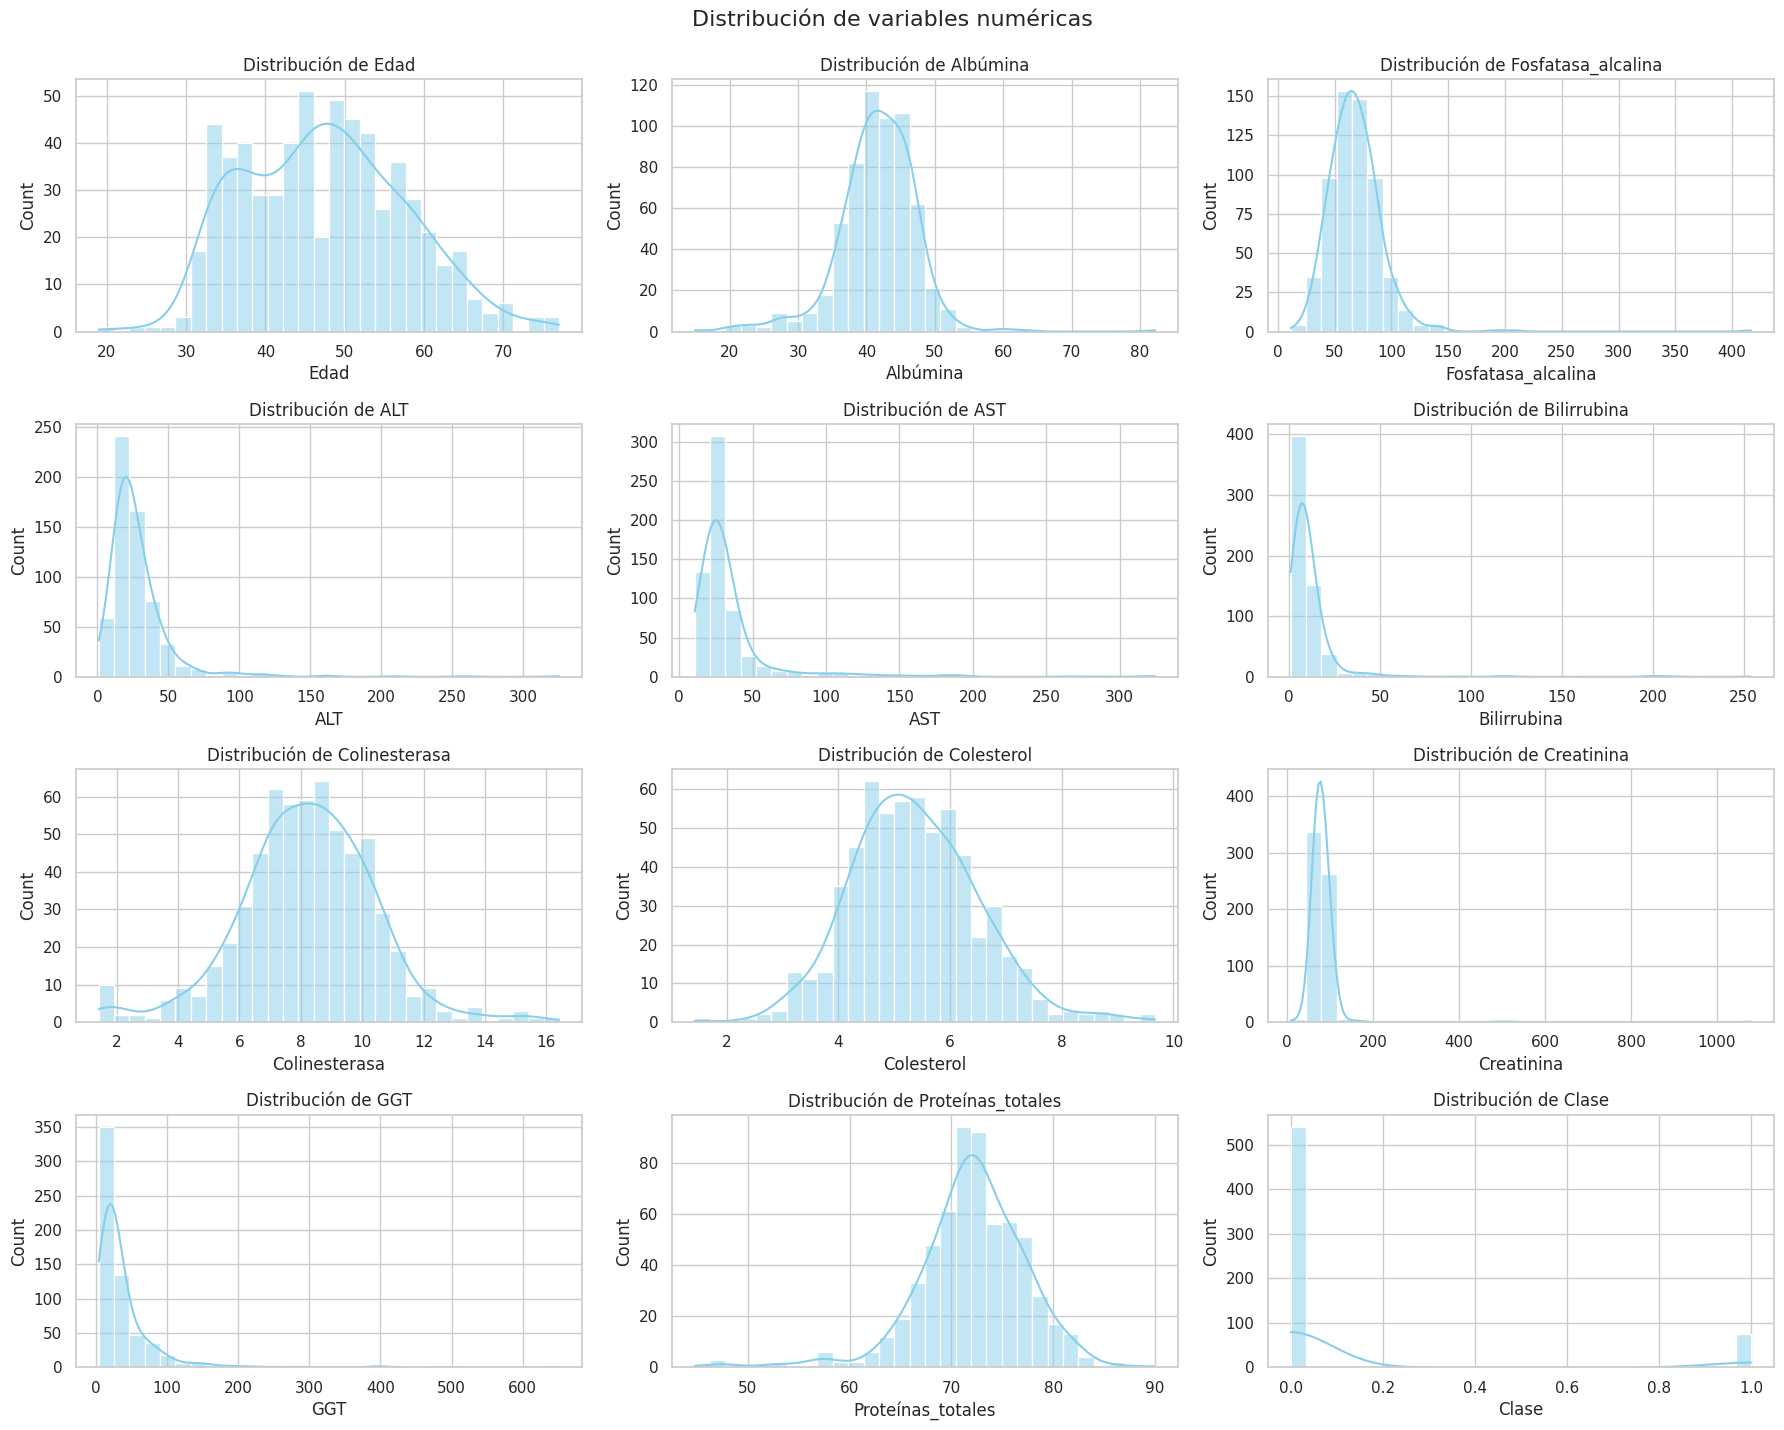

In [ ]:
# Selección de columnas numéricas
columnas = df.select_dtypes(include='number').columns

# Configurar estilo
sns.set(style="whitegrid")

# Creamos subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 14))
axes = axes.flatten()

# Iteramos sobre cada variable
for i, col in enumerate(columnas):
    sns.histplot(data=df, x=col, kde=True, bins=30, color="skyblue", ax=axes[i])
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)

# Ajustes finales
plt.tight_layout()
plt.suptitle("Distribución de variables numéricas", fontsize=16, y=1.02)
plt.show()


Observamos que...

- Edad: distribución simétrica, centrada en torno a los 47 años.
- ALT, AST, BIL, GGT, Creatinina: presentan distribuciones asimétricas a la derecha (colas largas), lo que indica valores extremos (outliers) en pacientes posiblemente enfermos.
- Colesterol, Proteínas totales, Albúmina: se aproximan a una distribución normal.
- Colinesterasa y Fosfatasa alcalina: también muestran sesgo a la derecha, pero más moderado.
- Clase: claramente desbalanceada, con mayoría de casos en 0 (sanos).

## Gráfico boxplot

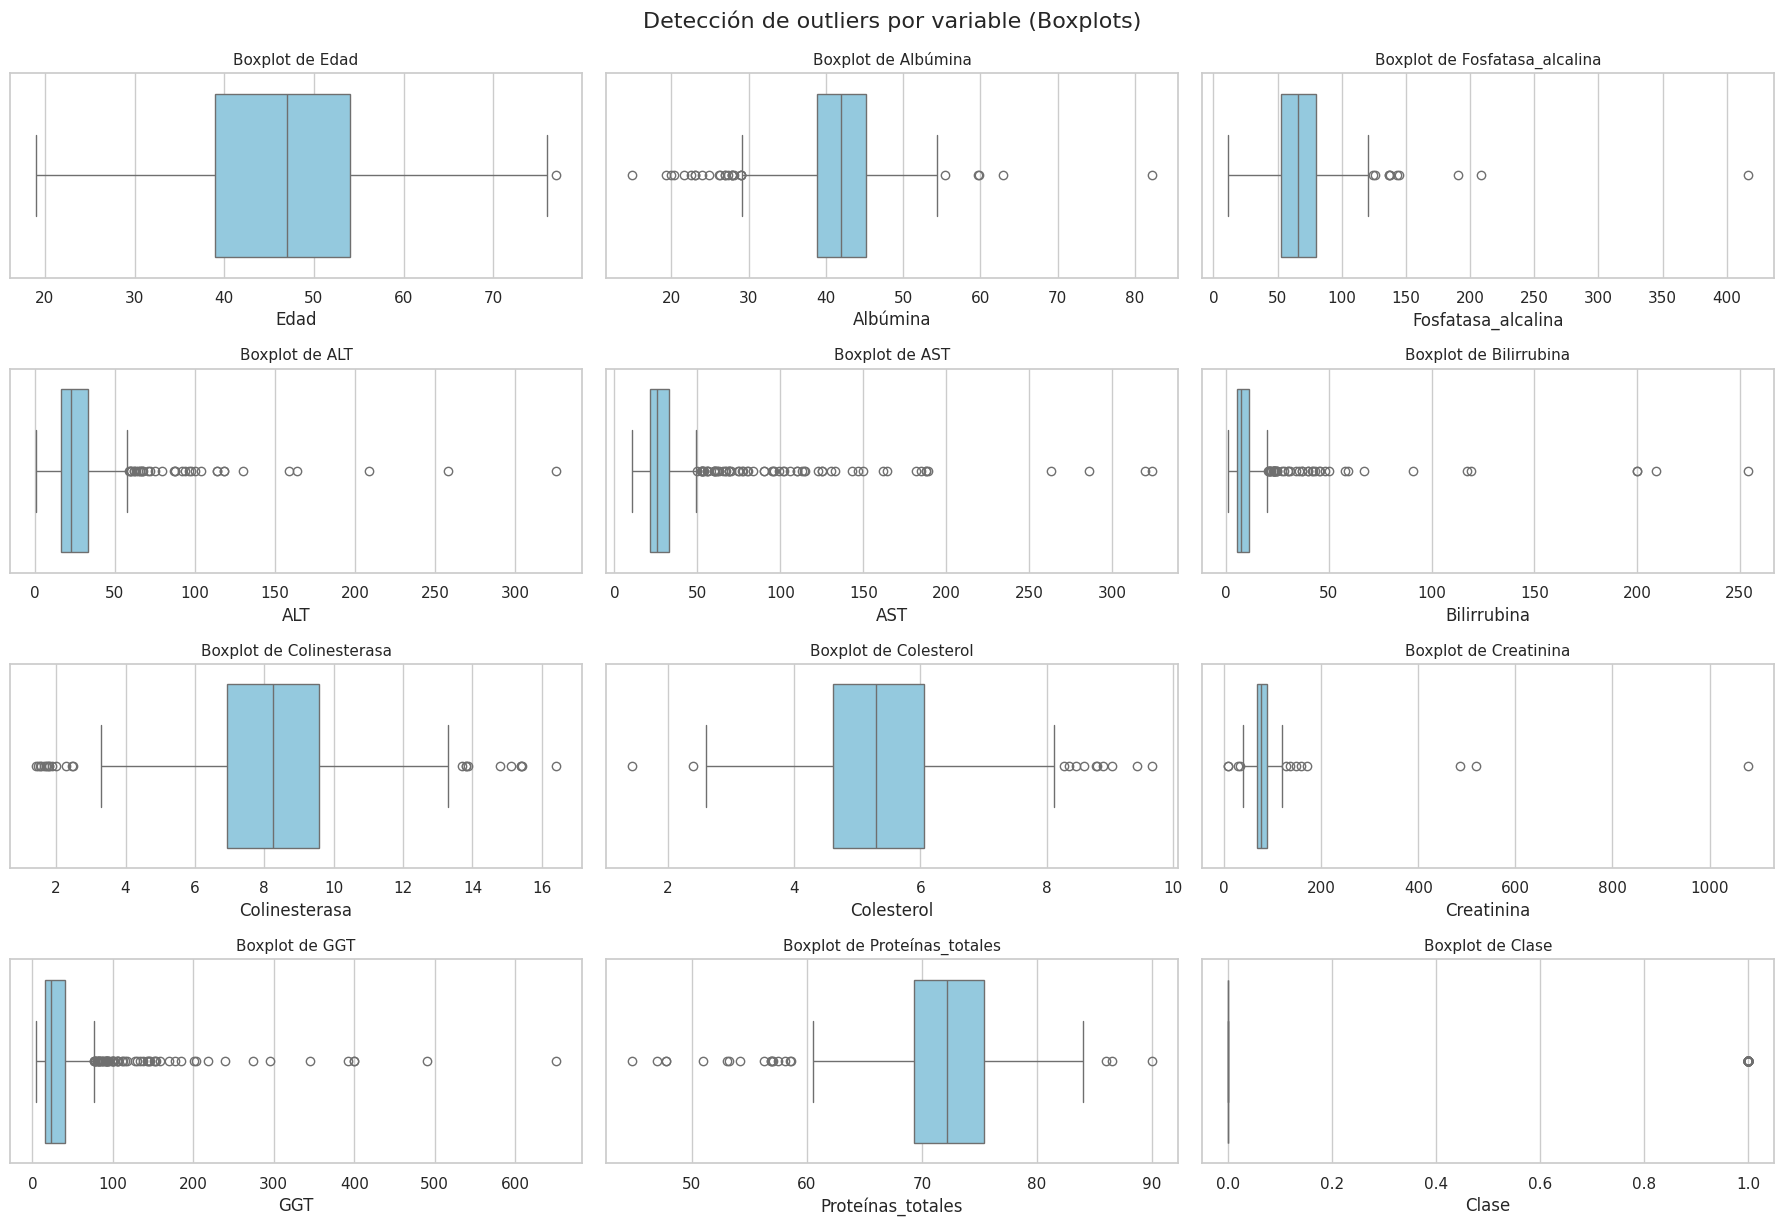

In [ ]:
# Seleccionamos columnas numéricas
columnas_numericas = df.select_dtypes(include='number').columns

# Configuramos figura
plt.figure(figsize=(18, 12))

# Boxplot por variable
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}', fontsize=11)
    plt.xlabel(col)

plt.tight_layout()
plt.suptitle("Detección de outliers por variable (Boxplots)", fontsize=16, y=1.02)
plt.show()


Observamos que...

- Edad: bastante pareja, pocos valores extremos.
- ALT, AST, GGT, Bilirrubina y Creatinina: tienen muchos outliers altos → típico en pacientes con problemas hepáticos.
- Albúmina, Fosfatasa, Colinesterasa y Proteínas: algunos valores fuera de lo normal, pero no tantos.
- Colesterol: distribución más estable, con pocos valores extremos.
- Clase: es binaria (0 y 1), no tiene outliers reales.

## Detección de Outliers

In [ ]:
# Función para detectar outliers con el método del IQR
def detect_outliers_iqr_all(df):
    outliers_dict = {}  # Creamos un diccionario vacío para almacenar los outliers de cada columna

    for column in df.select_dtypes(include=['number']).columns:  # Iteramos sobre todas las columnas numéricas
        Q1 = df[column].quantile(0.25)  # Calculamos el primer cuartil (Q1) - 25% de los datos son menores a este valor
        Q3 = df[column].quantile(0.75)  # Calculamos el tercer cuartil (Q3) - 75% de los datos son menores a este valor
        IQR = Q3 - Q1  # Calculamos el rango intercuartílico (IQR), que es la diferencia entre Q3 y Q1

        lower_bound = Q1 - 1.5 * IQR  # Definimos el límite inferior para detectar outliers
        upper_bound = Q3 + 1.5 * IQR  # Definimos el límite superior para detectar outliers

        # Filtramos los valores que están por debajo del límite inferior o por encima del límite superior
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Guardamos los resultados en el diccionario con el número de outliers y los límites calculados
        outliers_dict[column] = {
            'num_outliers': len(outliers),  # Número total de valores atípicos en la columna
            'lower_bound': round(lower_bound, 2),  # Límite inferior redondeado a 2 decimales
            'upper_bound': round(upper_bound, 2)  # Límite superior redondeado a 2 decimales
        }

    return outliers_dict  # Retornamos el diccionario con la información de los outliers

# Aplicamos la función al DataFrame
outliers_info = detect_outliers_iqr_all(df)

# Recorremos el diccionario de resultados e imprimimos la información de los outliers
for col, info in outliers_info.items():
    print(f"Columna: {col}")  # Imprime el nombre de la columna analizada
    print(f"Número de outliers: {info['num_outliers']}")  # Muestra cuántos valores atípicos se encontraron
    print(f"Límite inferior: {info['lower_bound']}")  # Muestra el límite inferior definido por el IQR
    print(f"Límite superior: {info['upper_bound']}")  # Muestra el límite superior definido por el IQR
    print("-" * 40)  # Imprime una línea separadora para mejor legibilidad


Columna: Edad
Número de outliers: 1
Límite inferior: 16.5
Límite superior: 76.5
----------------------------------------
Columna: Albúmina
Número de outliers: 27
Límite inferior: 29.2
Límite superior: 54.8
----------------------------------------
Columna: Fosfatasa_alcalina
Número de outliers: 10
Límite inferior: 11.1
Límite superior: 121.5
----------------------------------------
Columna: ALT
Número de outliers: 36
Límite inferior: -8.61
Límite superior: 58.09
----------------------------------------
Columna: AST
Número de outliers: 64
Límite inferior: 4.65
Límite superior: 49.85
----------------------------------------
Columna: Bilirrubina
Número de outliers: 47
Límite inferior: -3.55
Límite superior: 20.05
----------------------------------------
Columna: Colinesterasa
Número de outliers: 24
Límite inferior: 2.95
Límite superior: 13.57
----------------------------------------
Columna: Colesterol
Número de outliers: 12
Límite inferior: 2.44
Límite superior: 8.24
---------------------

Observamos que...

- Variables con muchos outliers:
AST (64), GGT (65), Bilirrubina (47), ALT (36), Albúmina (27) → tienen alta dispersión y muchos valores extremos, en su mayoría altos. Es común en pacientes enfermos.
- Variables con algunos outliers:
Colinesterasa, Creatinina, Fosfatasa alcalina, Colesterol, Proteínas_totales → presentan menos casos atípicos, pero pueden influir en el análisis.
- Edad: solo 1 outlier, lo cual indica buena distribución.
- Clase: detecta 75 "outliers", pero es un falso positivo porque es una variable binaria (0 o 1), y no aplica este tipo de análisis.


## Gráficos de dispersión (scatterplots) entre features y target.

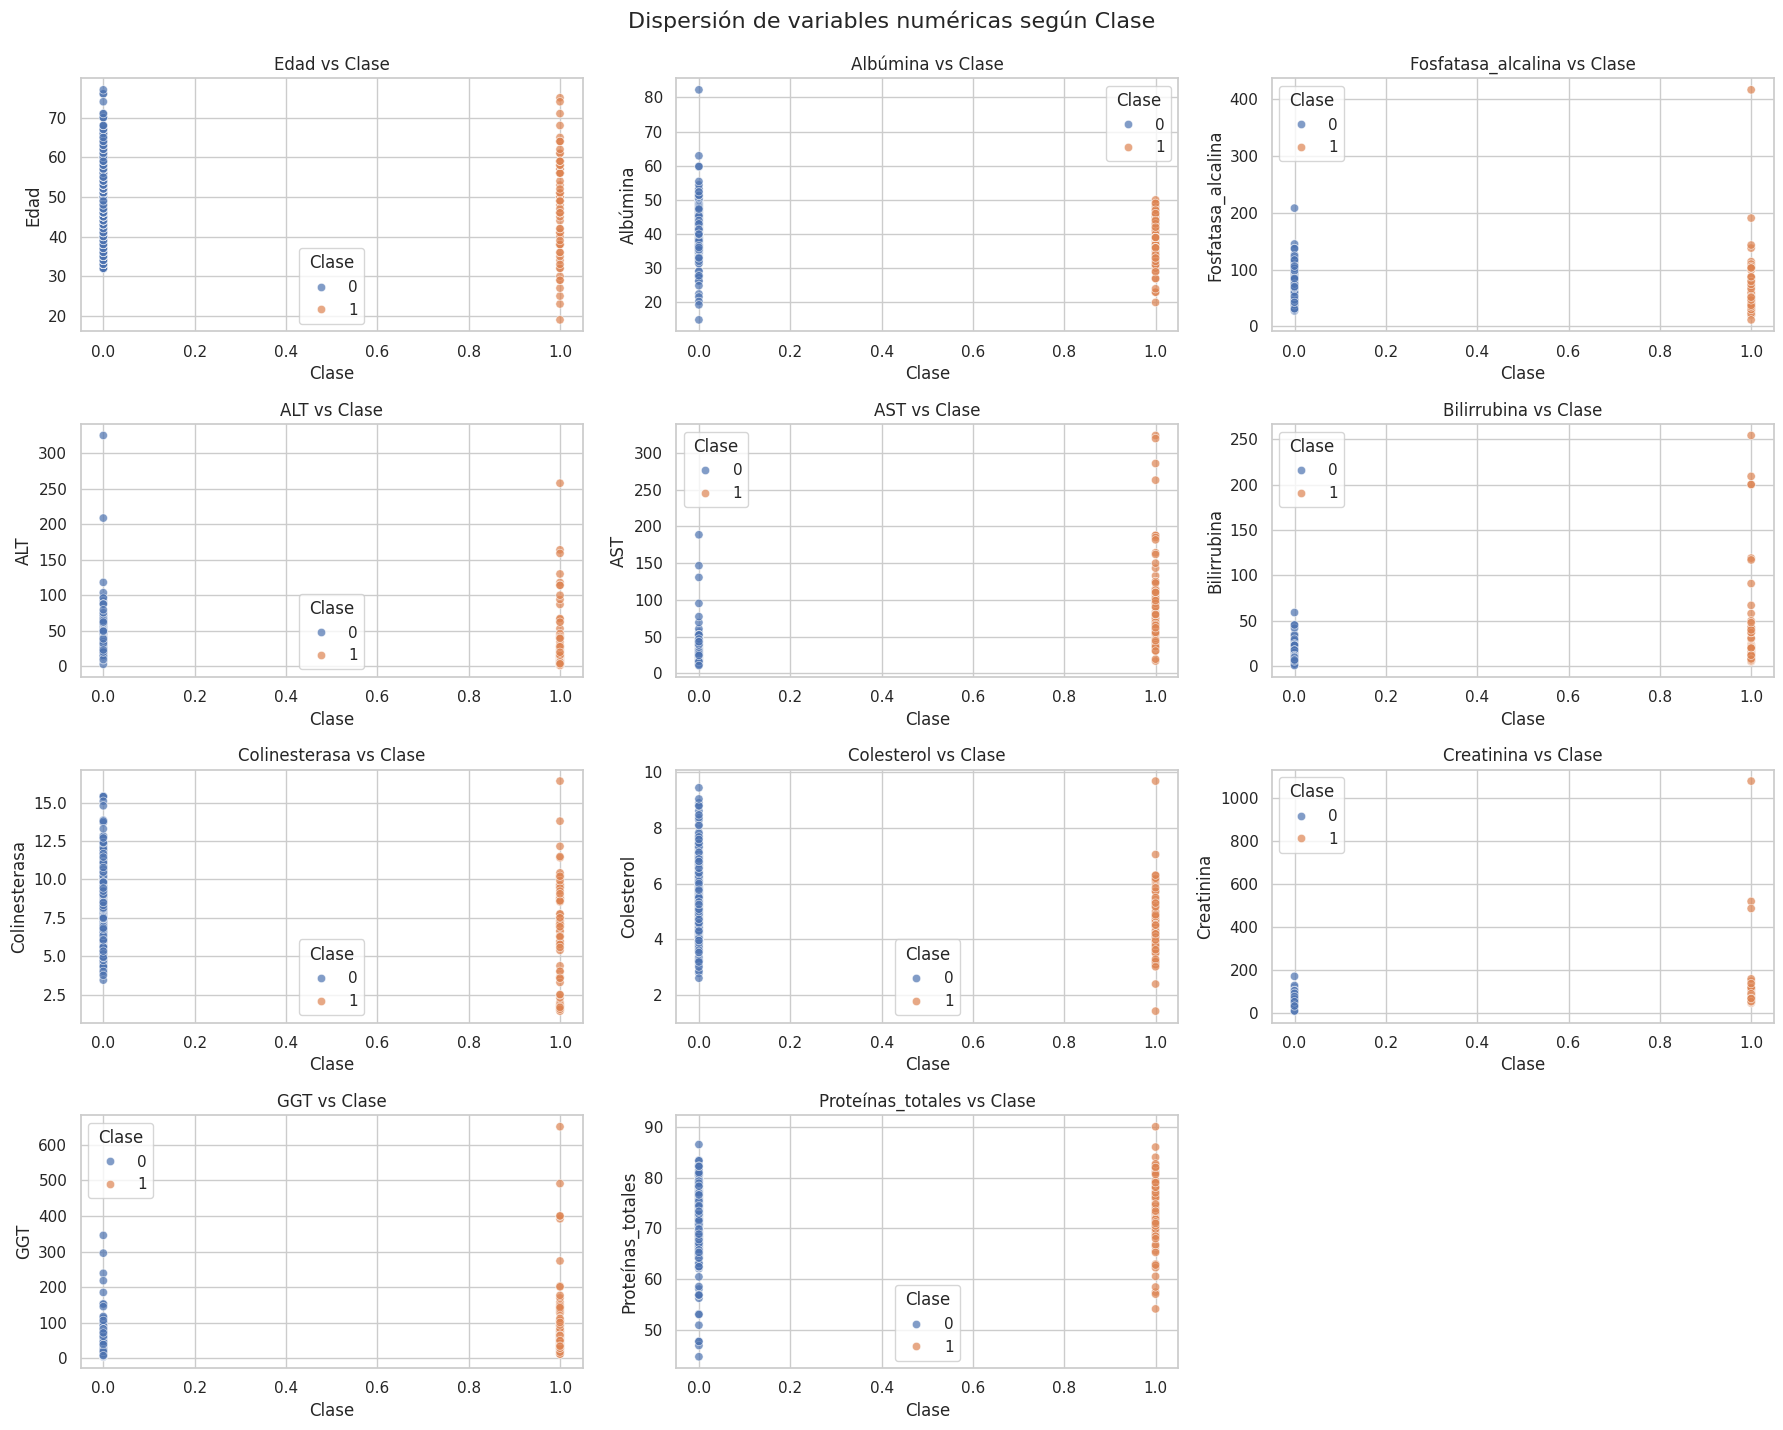

In [ ]:
# Lista de variables numéricas excepto la target
variables = df.select_dtypes(include='number').drop(columns='Clase').columns

# Configurar estilo
sns.set(style="whitegrid")

# Creamos subplots
plt.figure(figsize=(18, 14))

# Scatterplot por variable
for i, col in enumerate(variables, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(data=df, x='Clase', y=col, hue='Clase', palette='deep', alpha=0.7)
    plt.title(f'{col} vs Clase')
    plt.xlabel('Clase')
    plt.ylabel(col)

plt.tight_layout()
plt.suptitle('Dispersión de variables numéricas según Clase', fontsize=16, y=1.02)
plt.show()


Observamos que...

- En variables como ALT, AST, GGT, Bilirrubina y Creatinina, los valores de los pacientes con Clase = 1 (enfermos) están mucho más dispersos y altos que los sanos. O sea, estas variables cambian mucho cuando hay enfermedad.
- En otras como Edad, Albúmina, Proteínas y Colesterol, hay más mezcla entre los valores de sanos y enfermos, cuesta ver una separación clara.
- Algunas variables como Colinesterasa o Fosfatasa alcalina muestran cierta diferencia, pero no tan marcada.

## Matriz de Correlación

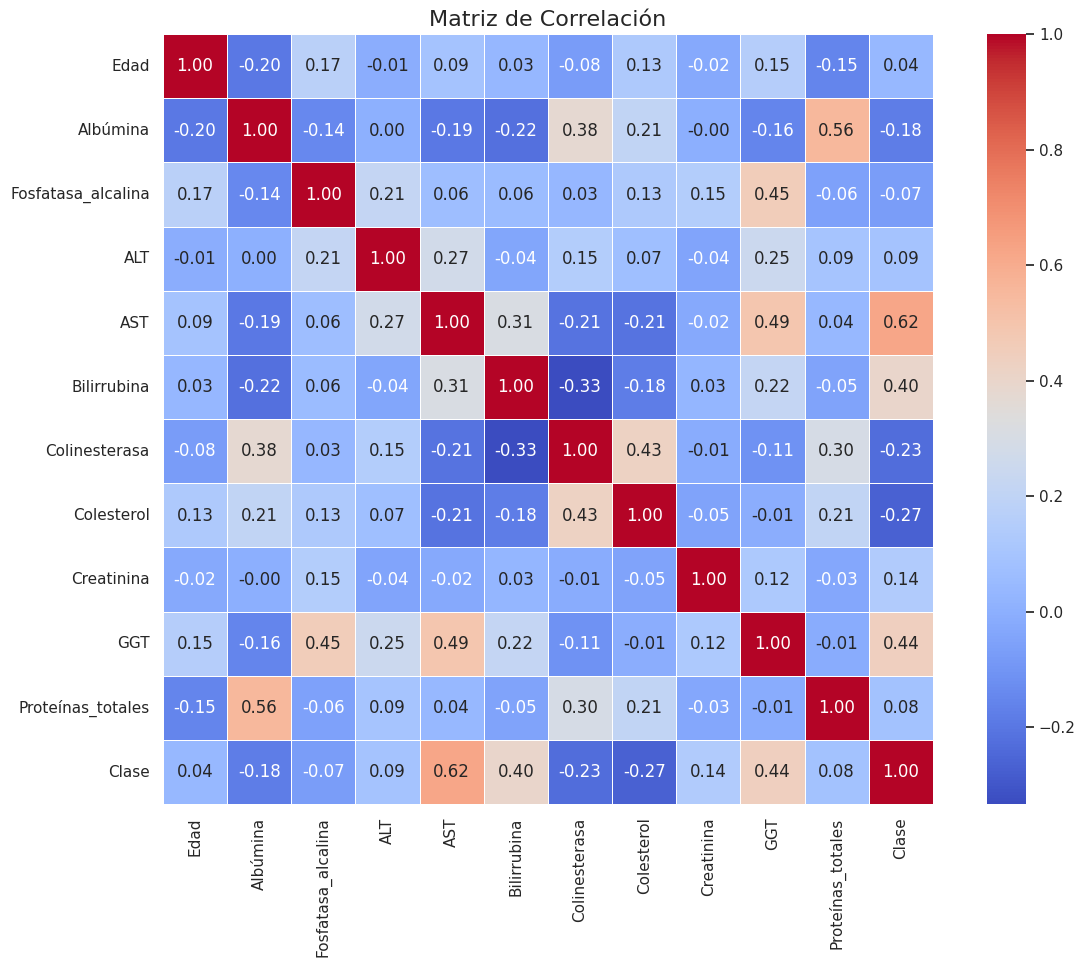

In [ ]:
# Calculamos la matriz de correlación
correlacion = df.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)
plt.title("Matriz de Correlación", fontsize=16)
plt.show()


Observamos que...

Las variables que más se relacionan con la Clase (enfermedad) son AST (0.62), GGT (0.44) y Bilirrubina (0.40), lo que indica que estas podrían ser buenas para predecir. Las demás tienen poca o ninguna correlación con el estado del paciente.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

## Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).

# Características del dataset

El dataset final tiene 615 filas (pacientes) y 13 variables numéricas, incluyendo la variable objetivo Clase.

El problema es de clasificación binaria, donde:
- Clase = 0: paciente sano (donante de sangre)
- Clase = 1: paciente con enfermedad hepática (hepatitis, fibrosis o cirrosis)

Las variables incluyen resultados de análisis clínicos como ALT, AST, GGT, Bilirrubina, Creatinina, entre otros.


In [ ]:
# Verificación de valore nulos
df.isnull().sum()

,0
Categoria,0
Edad,0
Sexo,0
Albúmina,1
Fosfatasa_alcalina,18
ALT,1
AST,0
Bilirrubina,0
Colinesterasa,0
Colesterol,10


Imputamos valores faltantes con la media de las columnas numéricas porque es una opción rápida y efectiva cuando hay pocos valores nulos.
No introduce sesgo como eliminar filas (serían 31 eliminadas).

In [ ]:
# Imputamos valores faltantes con la media en las columnas numéricas
df.fillna(df.mean(numeric_only=True), inplace=True)

# Verificamos que ya no haya nulos
print("Valores nulos:")
print(df.isnull().sum().sum())  # debe dar 0


Valores nulos:
0


# División del dataset (entrenamiento y testeo)

Vamos a dividir los datos en:

- 80% para entrenamiento
- 20% para testeo

Además, como Clase está desbalanceada (más sanos que enfermos), usamos el parámetro stratify=y para que ambas partes mantengan la misma proporción de clases.

In [ ]:
# Separamos variables predictoras y target
X = df.drop(columns='Clase')
y = df['Clase']

# División
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verificamos tamaño de los conjuntos
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de testeo: {X_test.shape}")


Conjunto de entrenamiento: (492, 13)
Conjunto de testeo: (123, 13)





## 4. **Clasificación con logistic regression**  
   

En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.

### 4.1 Entrenamiento y evaluación

Separamos los datos en entrenamiento y testeo, los escalamos con MinMaxScaler y entrenamos un modelo de regresión logística para hacer predicciones.

In [ ]:
# Eliminamos columnas categóricas innecesarias
X = df.drop(columns=['Clase', 'Categoria', 'Sexo'])

# División de datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, df['Clase'], test_size=0.2, random_state=42, stratify=df['Clase']
)

# Escalado
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Entrenamos el modelo
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_lr.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train = modelo_lr.predict(X_train_scaled)
y_pred_test = modelo_lr.predict(X_test_scaled)


### 4.2 Métricas de evaluación

Muestre el desempeño en el conjunto de datos de entrenamiento y testeo.
Mencione las métricas utilizadas. No se olvide de mostrar la matriz de confusión.
Explique los resultados obtenidos.

Evaluación en Entrenamiento
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       432
           1       0.91      0.33      0.49        60

    accuracy                           0.91       492
   macro avg       0.91      0.66      0.72       492
weighted avg       0.91      0.91      0.90       492


Evaluación en Testeo
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       108
           1       1.00      0.33      0.50        15

    accuracy                           0.92       123
   macro avg       0.96      0.67      0.73       123
weighted avg       0.93      0.92      0.90       123



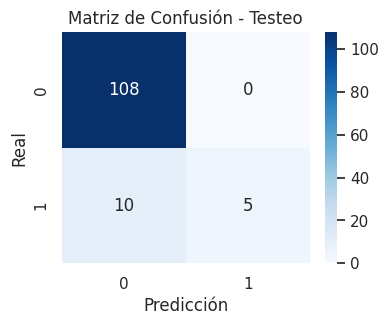

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reporte de métricas
print("Evaluación en Entrenamiento")
print(classification_report(y_train, y_pred_train))

print("\nEvaluación en Testeo")
print(classification_report(y_test, y_pred_test))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

# Matriz de confusión (testeo)
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Testeo")
plt.show()

Observamos que...

**Clase 0 (Personas sanas)**

- Precisión: 0.92 → El modelo predice correctamente a las personas sanas el 92% de las veces.
- Recall (Sensibilidad): 1.00 → Detecta todos los casos de personas sanas sin fallar.
- F1-Score: 0.96 → Excelente balance entre precisión y recall para esta clase.

El modelo funciona muy bien para detectar personas sanas.


**Clase 1 (Personas con hepatitis)**

- Precisión: 1.00 → Cuando predice que alguien está enfermo, acierta siempre.
- Recall: 0.33 → Solo detecta 1 de cada 3 personas con hepatitis.
- f1-Score: 0.50 → Bajo rendimiento general para esta clase.

⚠️ El modelo falla en detectar a tiempo a muchas personas enfermas, lo cual es crítico en un problema de salud. Esto se debe al desbalance en los datos (muchas más personas sanas que enfermas).


**Exactitud general (Accuracy)**

92% → Parece buena, pero está inflada por la gran cantidad de personas sanas correctamente clasificadas.


**Matriz de Confusión**

- 108 personas sanas fueron correctamente clasificadas como sanas (VP clase 0).
- 10 personas enfermas fueron clasificadas incorrectamente como sanas (FN clase 1).
- 5 personas enfermas fueron correctamente clasificadas como enfermas (VP clase 1).
- No hubo falsos positivos.


Conclusión

Aunque el modelo tiene buena precisión general, no sirve para detectar bien los casos de hepatitis, que es lo más importante en este trabajo. El problema principal es el desbalance: hay muchas más personas sanas que enfermas.


## 5- ** Otro clasificador **

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

# Modelo elegido: k-Nearest Neighbors (kNN)

Elijo kNN porque es simple, se adapta bien a datos no lineales y podría mejorar la detección de enfermos, que son la clase minoritaria.

### 5.2 Entrenamiento del modelo y 5.3 Evaluación del desempeño

Evaluación en Entrenamiento
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       432
           1       0.91      0.50      0.65        60

    accuracy                           0.93       492
   macro avg       0.92      0.75      0.80       492
weighted avg       0.93      0.93      0.92       492


Evaluación en Testeo
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       108
           1       1.00      0.60      0.75        15

    accuracy                           0.95       123
   macro avg       0.97      0.80      0.86       123
weighted avg       0.95      0.95      0.95       123



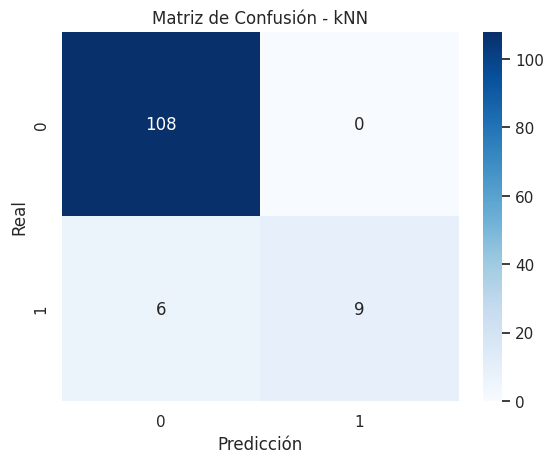

In [ ]:
# Importar librerías necesarias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenamos el modelo
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train_knn = modelo_knn.predict(X_train_scaled)
y_pred_test_knn = modelo_knn.predict(X_test_scaled)

# Evaluación en entrenamiento
print("Evaluación en Entrenamiento")
print(classification_report(y_train, y_pred_train_knn))

# Evaluación en testeo
print("\nEvaluación en Testeo")
print(classification_report(y_test, y_pred_test_knn))

# Matriz de confusión
matriz_conf_knn = confusion_matrix(y_test, y_pred_test_knn)
sns.heatmap(matriz_conf_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - kNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


Observamos que...

**Clase 0 (personas sanas):**

- El modelo acierta casi todos los casos (108 de 108 en el test).
- Precisión y recall muy altos (0.95 y 1.00), lo cual indica que detecta muy bien a los que no tienen hepatitis.

**Clase 1 (personas enfermas):**
- El modelo mejora respecto a la regresión logística: ahora acierta 9 de 15 enfermos.
- Recall sube a 0.60, es decir, identifica el 60% de los enfermos (antes era 33%).
- F1-score sube a 0.75, lo que refleja un mejor equilibrio entre precisión y recall.

**Accuracy general:**
- El modelo acierta el 95% del total de casos del test.

**Matriz de confusión:**
- Se ven menos errores que antes.
- El modelo sigue confundiendo a algunos enfermos con sanos (6 casos), pero mejora respecto al anterior.

## 6  Tuneo de hiperparámetros



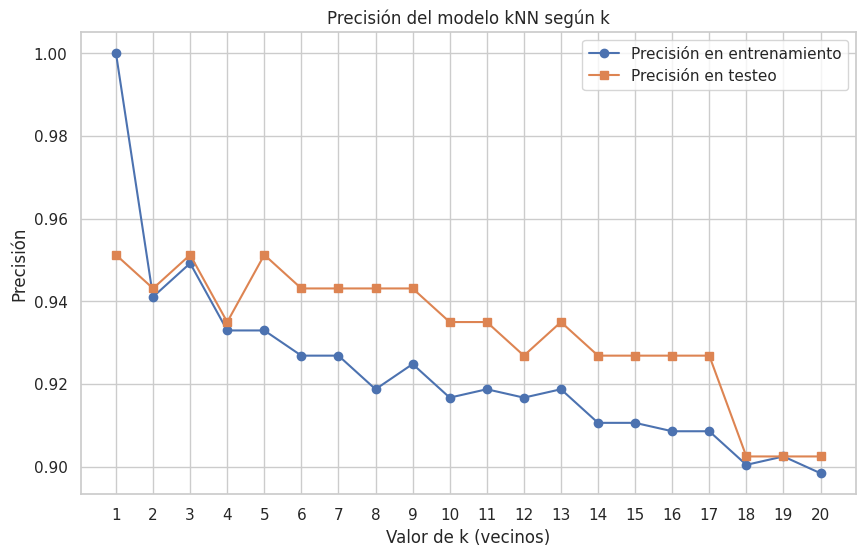

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Rangos de valores de k a evaluar
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

# Evaluamos el modelo para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predicciones
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)

    # Métricas
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Gráfico de desempeño
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Precisión en entrenamiento')
plt.plot(k_values, test_accuracies, marker='s', label='Precisión en testeo')
plt.xlabel('Valor de k (vecinos)')
plt.ylabel('Precisión')
plt.title('Precisión del modelo kNN según k')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()



Observamos que...

- Cuando el valor de k es muy bajo (como k=1), el modelo memoriza (alta precisión en entrenamiento) pero no aprende a generalizar, y eso afecta especialmente a los casos raros como Clase 1.

- Cuando k es muy alto (k > 17), el modelo se vuelve muy simple y tiende a clasificar todo como Clase 0, porque la mayoría de los vecinos que ve son sanos. Resultado: falla al detectar a los enfermos.

- En cambio, en el rango óptimo (k=3 a 10):
El modelo mantiene una buena precisión general en testeo.
Y lo más importante: detecta mejor la Clase 1 (mejor recall y f1-score para enfermos), como ya viste en la matriz de confusión donde acertó 9 de 15 enfermos, algo que no pasaba con otros modelos.

# **Bonus**

# Comparativo Regresión Logística y kNN

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ENTRENAMIENTO MODELO REGRESIÓN LOGÍSTICA
modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
modelo_lr.fit(X_train_scaled, y_train)
y_pred_lr = modelo_lr.predict(X_test_scaled)

# ENTRENAMIENTO MODELO KNN (con k óptimo que encontraste, por ej. k=5)
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_train_scaled, y_train)
y_pred_knn = modelo_knn.predict(X_test_scaled)

# EVALUACIÓN
print("=== REGRESIÓN LOGÍSTICA ===")
print(classification_report(y_test, y_pred_lr, digits=2))

print("=== kNN (k=3) ===")
print(classification_report(y_test, y_pred_knn, digits=2))


=== REGRESIÓN LOGÍSTICA ===
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       108
           1       1.00      0.33      0.50        15

    accuracy                           0.92       123
   macro avg       0.96      0.67      0.73       123
weighted avg       0.93      0.92      0.90       123

=== kNN (k=3) ===
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       108
           1       1.00      0.60      0.75        15

    accuracy                           0.95       123
   macro avg       0.97      0.80      0.86       123
weighted avg       0.95      0.95      0.95       123



## 6- Conclusiones


Trabajé un problema de clasificación binaria para detectar hepatitis (Clase 1) vs sanos (Clase 0). Probando dos modelos para detectar enfermos de hepatitis, vi que ambos clasifican bien a los sanos, pero kNN con k=3 es mucho mejor para encontrar a los enfermos (Clase 1): pasó del 33% (logística) al 60% de recall. Eso marca una gran diferencia en este problema binario y desbalanceado. En resumen, kNN con pocos vecinos es el más efectivo en este caso real.

# Referencias

https://colab.research.google.com/drive/1234xz45txgbu5hgDzox-ekSt5AHVhi2x?usp=sharing

- Material teórico de la materia

- ChatGPT para mejorar código y gráficos
